# Sheep coordinates from genome project
Here are some considerations on the latest coordinate set for sheep. The latest coordinates were downloaded from [ISGC](https://figshare.com/articles/dataset/Mapping_of_ISGC_SNP_chip_probes/8424935/2). There are a few considerations to make, first of all define some helper functions:

In [1]:
import csv
import pandas
import matplotlib.pyplot as plt

from collections import namedtuple, defaultdict

from src.features.utils import get_project_dir, text_or_gzip_open
from src.features.smarterdb import global_connection, VariantSheep

# connect to database
global_connection()

# define the source data file
data_dir = get_project_dir() / "data/external/SHE/CONSORTIUM"
ovine_snp50_oar3 = data_dir / "OvineSNP50_B.csv_v3.1_pos_20190513.csv.gz"
ovine_snp50_oar4 = data_dir / "OvineSNP50_B.csvv4.0_pos_20190513.csv.gz"
ovine_snpHD_oar3 = data_dir / "SheepHD_AgResearch_Cons_15041608_A.csv_v3.1_pos_20190513.csv.gz"
ovine_snpHD_oar4 = data_dir / "SheepHD_AgResearch_Cons_15041608_A.csvv4.0_pos_20190513.csv.gz"

# some helpers function
def process_coordinates(datafile):
    with text_or_gzip_open(datafile) as handle:
        reader = csv.reader(handle, delimiter=",")
        header = next(reader)
        Record = namedtuple("Record", header)
        for line in reader:
            # fix position column
            idx = header.index('pos')
            line[idx] = int(line[idx])

            # fix allele format
            idx = header.index('alleles')
            line[idx] = "/".join(list(line[idx]))

            # make a record from csv line
            record = Record._make(line)
            
            yield record

## About SNP50

First consideration: I have more SNPs in *smarter* database than the ones I have in the provided files:

In [2]:
n_snp50_in_db = VariantSheep.objects.filter(chip_name="IlluminaOvineSNP50").count()
n_snp50_oar3 = sum(1 for _ in process_coordinates(ovine_snp50_oar3))
n_snp50_oar4 = sum(1 for _ in process_coordinates(ovine_snp50_oar4))
print(f"I have {n_snp50_in_db} SNPs in the database for 'IlluminaOvineSNP50'")
print(f"I have {n_snp50_oar3} and {n_snp50_oar4} SNPs for 'OAR3' and 'OAR4' respectively in data files for the same chip")
print(f"(Missing {n_snp50_in_db - n_snp50_oar3} SNPs for 'OAR3' and {n_snp50_in_db - n_snp50_oar4} for 'OAR4')")

I have 54241 SNPs in the database for 'IlluminaOvineSNP50'
I have 47015 and 47019 SNPs for 'OAR3' and 'OAR4' respectively in data files for the same chip
(Missing 7226 SNPs for 'OAR3' and 7222 for 'OAR4')


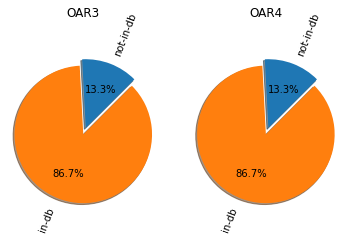

In [3]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['not-in-db', 'in-db']
oar3_sizes = [n_snp50_in_db-n_snp50_oar3, n_snp50_oar3]
oar4_sizes = [n_snp50_in_db-n_snp50_oar4, n_snp50_oar4]
explode = (0.1, 0)  # only "explode" the 1nd slice (i.e. 'Not-in-db')

# horizontally stacked subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(oar3_sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45, rotatelabels=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("OAR3")

ax2.pie(oar4_sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45, rotatelabels=45)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("OAR4")

plt.show()

## About SNPHD

In [4]:
n_snpHD_in_db = VariantSheep.objects.filter(chip_name="IlluminaOvineHDSNP").count()
n_snpHD_oar3 = sum(1 for _ in process_coordinates(ovine_snpHD_oar3))
n_snpHD_oar4 = sum(1 for _ in process_coordinates(ovine_snpHD_oar4))
print(f"I have {n_snpHD_in_db} SNPs in the database for 'IlluminaOvineHDSNP'")
print(f"I have {n_snpHD_oar3} and {n_snpHD_oar4} SNPs for 'OAR3' and 'OAR4' respectively in data files for the same chip")
print(f"(Missing {n_snpHD_in_db - n_snpHD_oar3} SNPs for 'OAR3' and {n_snpHD_in_db - n_snpHD_oar4} for 'OAR4')")

I have 606006 SNPs in the database for 'IlluminaOvineHDSNP'
I have 595291 and 595205 SNPs for 'OAR3' and 'OAR4' respectively in data files for the same chip
(Missing 10715 SNPs for 'OAR3' and 10801 for 'OAR4')


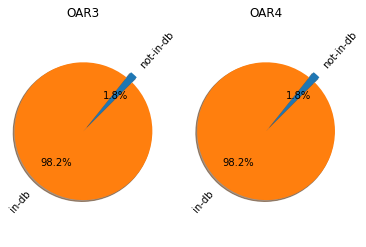

In [5]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['not-in-db', 'in-db']
oar3_sizes = [n_snpHD_in_db-n_snpHD_oar3, n_snpHD_oar3]
oar4_sizes = [n_snpHD_in_db-n_snpHD_oar4, n_snpHD_oar4]
explode = (0.1, 0)  # only "explode" the 1nd slice (i.e. 'Not-in-db')

# horizontally stacked subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(oar3_sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45, rotatelabels=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("OAR3")

ax2.pie(oar4_sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45, rotatelabels=45)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("OAR4")

plt.show()

## Mismatches bewteen datasets

Second consideration: there are mismatches in positions for some SNPs in common between the two assemblies:


In [6]:
# track all the snps in common between the two illumina chips
common_snps_names = set([variant.name for variant in VariantSheep.objects.filter(chip_name__all=["IlluminaOvineSNP50", "IlluminaOvineHDSNP"]).fields(name=1)])
common_snps = defaultdict(lambda: [None, None])

# process SNP50 for common snps and positions
for record in process_coordinates(ovine_snp50_oar3):
    if record.entry in common_snps_names:
        common_snps[record.entry][0] = record
    
# process SNPHD for common snps and positions
for record in process_coordinates(ovine_snpHD_oar3):
    if record.entry in common_snps_names:
        common_snps[record.entry][1] = record

In [7]:
mismatches = []

for key, [snp50, snpHD] in common_snps.items():
    if not snp50 or not snpHD:
        # some SNPs in common are missing in both files
        # print(f"Missing {key}")
        continue
    if snp50.chrom != snpHD.chrom or snp50.pos != snpHD.pos:
        mismatches.append(key)
        
print(f"There are {len(mismatches)} SNPs with different positions")

data = defaultdict(list)

for key in mismatches:
    snp50, snpHD = common_snps[key]
    snp50_pos = f"{snp50.chrom}:{snp50.pos}"
    snpHD_pos = f"{snpHD.chrom}:{snpHD.pos}"
    data["entry"].append(key)
    data["snp50"].append(snp50_pos)
    data["snpHD"].append(snpHD_pos)
    
pandas.DataFrame.from_dict(data)

There are 41 SNPs with different positions


,entry,snp50,snpHD
0,OAR1_36892031.1,1:35921824,1:35921867
1,s13764.1,1:88483339,1:88483343
2,OAR1_149400642.1,1:138263045,1:138263042
3,OAR1_205005285.1,1:190060582,1:190060291
4,s75140.1,1:190608513,1:190608515
5,OAR1_240651665.1,1:223202691,1:223202701
6,s49200.1,1:262512895,1:262513664
7,s01225.1,1:263153610,16:27239006
8,OAR2_28934548.1,2:27912185,2:27912187
9,s47673.1,2:88986269,2:88985985


The same applies for *OAR4*:

In [8]:
# track all the snps in common between the two illumina chips
common_snps = defaultdict(lambda: [None, None])

# process SNP50 for common snps and positions
for record in process_coordinates(ovine_snp50_oar4):
    if record.entry in common_snps_names:
        common_snps[record.entry][0] = record
    
# process SNPHD for common snps and positions
for record in process_coordinates(ovine_snpHD_oar4):
    if record.entry in common_snps_names:
        common_snps[record.entry][1] = record

In [9]:
mismatches = []

for key, [snp50, snpHD] in common_snps.items():
    if not snp50 or not snpHD:
        # some SNPs in common are missing in both files
        # print(f"Missing {key}")
        continue
    if snp50.chrom != snpHD.chrom or snp50.pos != snpHD.pos:
        mismatches.append(key)
        
print(f"There are {len(mismatches)} SNPs with different positions")

data = defaultdict(list)

for key in mismatches:
    snp50, snpHD = common_snps[key]
    snp50_pos = f"{snp50.chrom}:{snp50.pos}"
    snpHD_pos = f"{snpHD.chrom}:{snpHD.pos}"
    data["entry"].append(key)
    data["snp50"].append(snp50_pos)
    data["snpHD"].append(snpHD_pos)
    
pandas.DataFrame.from_dict(data)

There are 41 SNPs with different positions


,entry,snp50,snpHD
0,OAR1_36892031.1,1:35864552,1:35864595
1,s13764.1,1:88357214,1:88357218
2,OAR1_149400642.1,1:138085166,1:138085163
3,OAR1_205005285.1,1:189890479,1:189890188
4,s75140.1,1:190436464,1:190436466
5,OAR1_240651665.1,1:223053301,1:223053311
6,s49200.1,1:262343539,1:262344308
7,s01225.1,1:262974976,16:27231030
8,OAR2_28934548.1,2:27925922,2:27925924
9,s47673.1,2:89026107,2:89025823
